## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [6]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./

zsh:1: command not found: wget


1. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

In [31]:
import pandas as pd

file = "./data/data_000637.txt"
dataset_complete = pd.read_csv(file)

N = 125000
dataset_reduced = dataset_complete.loc[:N-1]

dataset_reduced


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
124995,1,0,22,3869201409,2368,21
124996,1,0,64,3869201409,2362,22
124997,1,0,117,3869201409,2368,25
124998,1,0,57,3869201409,2372,1


2. Find out the number of BX in a ORBIT (the value 'x').

In [23]:
x = max(dataset_reduced["BX_COUNTER"])+1

print(f"The average number of BX in a ORBIT is {x}")

The average number of BX in a ORBIT is 3564


3. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [25]:
time = (max(dataset_complete['ORBIT_CNT'])*(x)-min(dataset_complete['ORBIT_CNT'])*(x))*25

#sub = min(dataset_reduced['timens'])
#dataset_reduced.drop(columns=['timens'])
#dataset_reduced

#time = dataset_reduced['timens'].max() - dataset_reduced['timens'].min()
print(f'The data taking lasted {time}ns\n')

The data taking lasted 980456400ns



4. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [46]:
dataset_complete["timens"] = dataset_complete["TDC_MEAS"]*25/30+dataset_complete["BX_COUNTER"]*30#+(dataset_complete["ORBIT_CNT"]-min(dataset_complete["ORBIT_CNT"]))*x*25

dataset_complete

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,timens
0,1,0,123,3869200167,2374,26,71241.666667
1,1,0,124,3869200167,2374,27,71242.500000
2,1,0,63,3869200167,2553,28,76613.333333
3,1,0,64,3869200167,2558,19,76755.833333
4,1,0,64,3869200167,2760,25,82820.833333
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,22871.666667
1310716,1,1,4,3869211171,763,11,22899.166667
1310717,1,0,64,3869211171,764,0,22920.000000
1310718,1,0,139,3869211171,769,0,23070.000000


5. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [47]:
import numpy as np

dataset_reduced['HEAD'] = np.random.random(N)

dataset_reduced

/var/folders/6w/vv6mxd6s5tn2fg5xf8lytbl40000gp/T/ipykernel_70576/1526499972.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_reduced['HEAD'] = np.random.random(N)


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,0.299601,0,123,3869200167,2374,26
1,0.362849,0,124,3869200167,2374,27
2,0.754737,0,63,3869200167,2553,28
3,0.529316,0,64,3869200167,2558,19
4,0.703696,0,64,3869200167,2760,25
...,...,...,...,...,...,...
124995,0.250629,0,22,3869201409,2368,21
124996,0.715320,0,64,3869201409,2362,22
124997,0.493515,0,117,3869201409,2368,25
124998,0.239616,0,57,3869201409,2372,1


6. Create a new DataFrame that contains only the rows with HEAD=1

In [33]:
H0 = dataset_reduced[dataset_reduced['HEAD']>0.999]

H0

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
363,0.999112,0,124,3869200171,266,19
3009,0.999507,1,16,3869200197,1238,23
3298,0.999613,1,6,3869200199,3495,19
4366,0.999592,0,60,3869200211,97,20
4828,0.999549,0,64,3869200215,2300,6
...,...,...,...,...,...,...
120561,0.999750,1,139,3869201365,818,0
122009,0.999754,1,1,3869201380,1075,4
122748,0.999526,1,12,3869201387,671,8
123145,0.999317,0,57,3869201391,2107,10


7. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

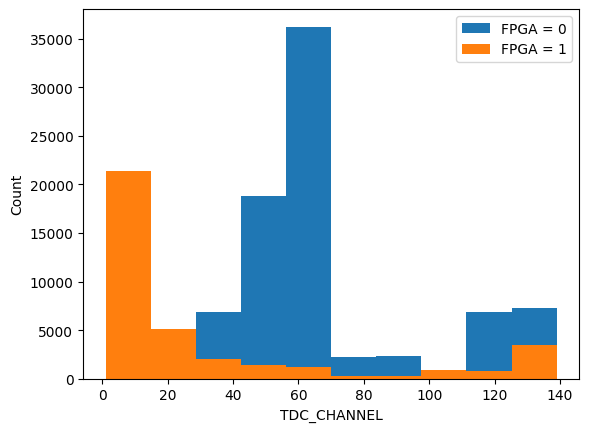

In [43]:
import matplotlib.pyplot as plt

FPGA1 = dataset_reduced[dataset_reduced['FPGA']==0]
FPGA2 = dataset_reduced[dataset_reduced['FPGA']==1]
plt.hist(FPGA1['TDC_CHANNEL'],label = "FPGA = 0")
plt.hist(FPGA2['TDC_CHANNEL'],label = "FPGA = 1")
plt.xlabel('TDC_CHANNEL')
plt.ylabel("Count")
plt.legend(loc="best")

8. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [60]:
TDC_group = dataset_complete.groupby("TDC_CHANNEL").count()

print(TDC_group.sort_values(by = "HEAD", ascending = 0)["HEAD"].head(3))

TDC_CHANNEL
139    108059
64      66020
63      64642
Name: HEAD, dtype: int64


9. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [68]:
T_channel = 139
n = dataset_complete[dataset_complete["TDC_CHANNEL"]==T_channel].nunique()

print(f"The unique orbits within at least one measurement from TDC_CHANNEL = {T_channel} is {n["ORBIT_CNT"]}")

The unique orbits within at least one measurement from TDC_CHANNEL = 139 is 10976
